# Parte 2: Metodos de ensamble para predecir Ventas y Comparacion Final 

Se utiliza el dataset `Carseats` para predecir ventas de sillas para autos infantiles.

In [20]:
# Cargamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de Scikit-Learn 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de gráficos
%matplotlib inline
sns.set_style("white")

In [72]:
# Notebook configuration
import six
import sys
from IPython.display import Image
sys.modules['sklearn.externals.six'] = six

# Basic
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pydot

# Scikit-Learn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Matplotlib configuration
%matplotlib inline
# plt.style.use('seaborn-white')
plt.style.use('seaborn-v0_8-white')   # debido a la versión nueva de matplotlib


## 2.1 Preparacion de datos

a) Explore la base de datos, verifique si hay valores nulos y revise los tipos de datos.

In [49]:
# Cargamos la base de datos + limpieza
df = pd.read_csv('https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/carseats.csv').drop('Unnamed: 0', axis=1).dropna()

# Verificamos si hay valores nulos y los tipos de datos
print("Información del Dataset:")
df.info()


Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [56]:
# Observando mejor los tipos de variables
display(df.head())

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


- Vemos que no las variable no tienen valores nulos.
- Vemos que 7 de las 11 variables son del tipo entero. Ademas, hay 3 variables que son categóricas. Finalmente, una variable del tipo decimal.

In [60]:
# Tratamiento de variables categóricas
# El dataset Carseats tiene variables de texto (ShelveLoc, Urban, US) que los modelos no leen directamente.
# Por eso, las convertimos en numéricas factorizandolas

df.ShelveLoc = pd.factorize(df.ShelveLoc)[0]
df.Urban = pd.factorize(df.Urban)[0]
df.US = pd.factorize(df.US)[0]


b) Separe los datos en predictores (`X`) y la variable objetivo (y, la columna `Sales`).

In [62]:
# Separamos los predictores (X) y variable objetivo (y)
# Objetivo: 'Sales'

X = df.drop('Sales', axis=1)
y = df.Sales.values

c) Divida los datos en un conjunto de entrenamiento (`80 %`) y un conjunto de prueba
(`20 %`), usando `random state=10`.

In [82]:
# Dividimos la data en entrenamiento y testeo
target = [ 'Sales' ]
predictors = [ var for var in df.columns if var not in target ]

X_train, X_test, y_train, y_test = train_test_split(df[predictors], df[target], test_size=0.2, random_state=10)

In [84]:
# Vector unidimensional para las Ys
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [86]:
# Ahora sí está listo para los modelos y graficos
regr = DecisionTreeRegressor(max_depth=3)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)


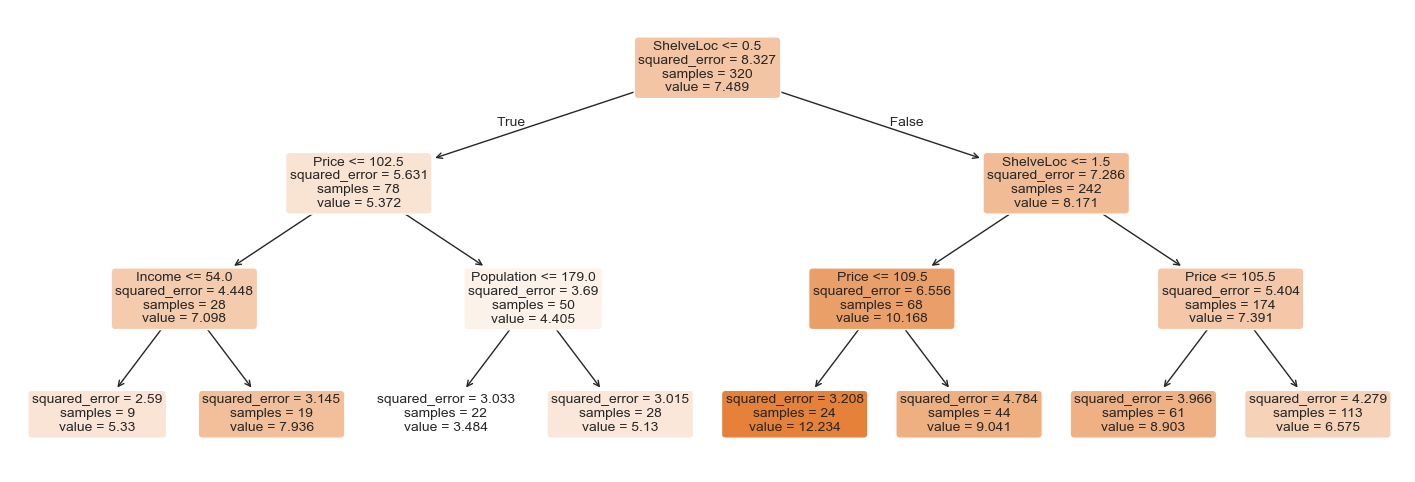

In [88]:
# Configuramos el tamaño
plt.figure(figsize=(18, 6))

plot_tree(regr2, 
          feature_names=predictors,  # Aquí usamos la lista de variables 'predictors'
          filled=True, 
          rounded=True, 
          fontsize=10)

plt.show()

## 2.2. Modelos de Ensamble: Versión Base vs. Optimizada 

a) Modelos Base a Criterio Propio:
- Entrene un BaggingRegressor usando hiperparametros que considere razonables.
- Entrene un RandomForestRegressor usando hiperparametros que considere
razonables.
- Entrene un GradientBoostingRegressor usando hiperparametros que considere
razonables.

Para cada modelo, evalue su rendimiento calculando el MSE sobre el conjunto de
prueba.

In [ ]:
# Entrenando un BaggingRegressor
#----------------------------------
# Usamos n_estimators=100 como un valor razonable estándar

bagging = BaggingRegressor(max_features=13, random_state=1)  # definimos el numero de variables que usaremos : 13
bagging.fit(X_train, y_train)  # le decimos que solo trabaje con la data de entrenamiento

In [ ]:
y_pred = bagging.predict(X_test)


In [ ]:
# Usando otras metricas (como el error cuadradado medio, R2)
mse_bag = round( mean_squared_error(y_test, y_pred), 3 )
r2_bag = round( r2_score(y_test, y_pred), 3 )

metrics_bag = pd.DataFrame({
    'Model': ['Bagging'],
    'Mean Squared Error (MSE)': [mse_bag],
    'R-squared (R2)': [r2_bag]
})
metrics_bag

In [ ]:
# Entrenando un Random Forest
#----------------------------------

In [ ]:
# RF elige 13 variables aleatoriamente, asi los arboles tendran distintos grupos de variables para trabajar
# Eso mejora el desempeño del algoritmo.

rf = RandomForestRegressor(max_features=13, random_state=1)
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)


In [ ]:
mse_rf = round( mean_squared_error(y_test, y_pred), 3 )
r2_rf = round( r2_score(y_test, y_pred), 3 )

metrics_rf = pd.DataFrame({
    'Model': ['Random Forest'],
    'Mean Squared Error (MSE)': [mse_rf],
    'R-squared (R2)': [r2_rf]
})
metrics_rf


# Pasamos de una MSE de 18 a una de 16, usando RF

In [ ]:
# Entrenando un Gradient Boosting
#----------------------------------

In [ ]:
boost = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=1)
# n_estimators: Nro de arboles que usa
# learning_rate: Tasa de aprendizaje

boost.fit(X_train, y_train)

In [ ]:
y_pred = boost.predict(X_test)


In [ ]:
mse_boost = round( mean_squared_error(y_test, y_pred), 3 )
r2_boost = round( r2_score(y_test, y_pred), 3 )

metrics_boost = pd.DataFrame({
    'Model': ['Gradient Boosting Regressor'],
    'Mean Squared Error (MSE)': [mse_boost],
    'R-squared (R2)': [r2_boost]
})
metrics_boost

# Vemos que el MSE ha bajado un poquito

In [ ]:
metrics_combined = pd.concat([metrics_bag, metrics_rf, metrics_boost])
metrics_combined = metrics_combined.sort_values('R-squared (R2)', ascending=False).reset_index(drop=True)
metrics_combined

In [68]:
# ==========================================
# 2.2 Modelos Base a Criterio Propio
# ==========================================

# Diccionario para guardar los resultados y compararlos después
resultados_base = {}

# 1. Bagging Regressor
# Usamos n_estimators=100 como un valor razonable estándar
bag_base = BaggingRegressor(n_estimators=100, random_state=10)
bag_base.fit(X_train, y_train)
y_pred_bag = bag_base.predict(X_test)
mse_bag = mean_squared_error(y_test, y_pred_bag)
resultados_base['Bagging Base'] = mse_bag
print(f"MSE Bagging Base: {mse_bag:.4f}")

# 2. Random Forest Regressor
# n_estimators=100 suele ser el default en versiones modernas de sklearn
rf_base = RandomForestRegressor(n_estimators=100, random_state=10)
rf_base.fit(X_train, y_train)
y_pred_rf = rf_base.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
resultados_base['Random Forest Base'] = mse_rf
print(f"MSE Random Forest Base: {mse_rf:.4f}")

# 3. Gradient Boosting Regressor
# Usamos una tasa de aprendizaje (learning_rate) estándar de 0.1
gb_base = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=10)
gb_base.fit(X_train, y_train)
y_pred_gb = gb_base.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
resultados_base['Gradient Boosting Base'] = mse_gb
print(f"MSE Gradient Boosting Base: {mse_gb:.4f}")

# Mostrar resumen parcial
print("\n--- Resumen de MSE (Modelos Base) ---")
for modelo, mse in resultados_base.items():
    print(f"{modelo}: {mse:.4f}")

C:\Users\LESLY\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:581: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


MSE Bagging Base: 2.0345
MSE Random Forest Base: 2.0267


C:\Users\LESLY\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\LESLY\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


MSE Gradient Boosting Base: 1.7015

--- Resumen de MSE (Modelos Base) ---
Bagging Base: 2.0345
Random Forest Base: 2.0267
Gradient Boosting Base: 1.7015


b) Modelos Optimizados con GridSearchCV:
- Optimice un BaggingRegressor usando `GridSearchCV (cv=5)`. Pruebe con: `{’n estimators’: [50, 100, 200]}`.
- Optimice un RandomForestRegressor. Pruebe: `{’n estimators’: [100, 200], ’max features’: [’sqrt’, 5, 10]}`. Indique cuales son las variables mas importantes segun el modelo.
- Optimice un GradientBoostingRegressor. Pruebe: `{’n estimators’: [100, 200], ’learning rate’: [0.01, 0.1], ’max depth’: [3, 5]}`.

Para cada modelo, evalue el MSE del mejor estimador encontrado sobre el conjunto de prueba.

c) Compare el MSE de los modelos base con el de los modelos optimizados. ¿Mejoró el rendimiento después de usar `GridSearchCV`? ¿Por qu´e es importante el ajuste de hiperparámetros?

## 2.3. Comparación Final y Conclusión

a) Cree una tabla resumen que compare el MSE en el **conjunto de prueba** para los 3 modelos optimizados ajustados con `GridSearchCV`. ¿Qué modelo tiene el mejor rendimiento?

b) Basado en la tabla de comparaci´on final, ¿qu´e modelo le recomendar´ıa a la empresa para predecir las ventas? Justifique su elecci´on considerando el **rendimiento predictivo** (MSE) y la **interpretabilidad** de los modelos.